# Hito 1

# Preliminares

Lo que desea el organismo es saber la probabilidad de que un inviduo presente salarios por sobre o bajo los 50.000 dolares anuales, al ser dos condiciones es un problema de clasificación.

Para medir el desempeño se utilizará una matriz de confusión, donde se cruza la información de la predicción con las etiquetas reales de la muestra de validación. (lib -> sklearn.metrics import confusion_matrix

# Aspectos computacionales
pandas: Es una herramienta para analizar y manipular datos.

numpy: Es una herramienta que proporciona un objeto de matriz multidimensional y varias operaciones para matrices.

pyplot: Crea figuras, trazados, lineas, etc. En general tiene funciones para graficar

seaborn: Es una libreria de visualización de datos.

confusion_matrix: Calcula la matriz de confución para evaluar el desempeño de una clasificación.

PolynomialFeatures: Genera una matriz con las interacciones de todas las combinaciones de polinomios. 


# Datos:

Como en el enunciado avisa que los datos perdidos no son NaN, sino un '?', se utiliza el where de numpy para buscar aquellas celdas que tienen el signo y no tomarlas en cuenta. Luego para verificar se utiliza un dropna().

Para recodificar en la mayoria de columnas se utiliza la funcion loc gracias a su propiedad de acceder a una fila o columna según una condición. También para la columna 'income' se utiliza where() de numpy ya que son solo dos datos y se puede representar de forma binaria. Para verificar que los pasos anteriores fueron efectivos y que no quedaron datos perdidos, se verificará a traves de una consulta. Por ultimo, se eliminarán las columnas anteriores.

Para tener las metricas de evaluación, se va a generar tres modelos, modelo lineal aditivo, modelo lineal con interacciones de 2-orden y modelo lineal con interaccion de 3-orden, para generar las interacciones se usará PolynomialFeatures, posteriormente se concatena la función fit_transform para luego graficar el comportamiento de los datos de los tres modelos mediante validación cruzada.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import funciones_clasificacion as fun
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("income-db.csv")
df= df.where(df!='?')
cantinicial=df.sum()
perdida= df.isna().sum()
df= df.dropna()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#1 ← Prof-specialty, Exec-managerial, Adm-clerical, sales, Tech-support.
#2 ← Craft-repair, Machine-op-inspct, Transport-moving, Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
#3 ← Other-service, Armed-Forces.

df.loc[(df['occupation']=="Prof-specialty") | (df['occupation']=="Exec-managerial") | (df['occupation']=="Adm-clerical")| (df['occupation']=="Sales")| (df['occupation']=="Tech-support"), 'collars'] = 1


df.loc[((df['occupation']=="Craft-repair") | (df['occupation']=="Machine-op-inspct") | (df['occupation']=="Transport-moving")| (df['occupation']=="Handlers-cleaners")| (df['occupation']=="Farming-fishing") | (df['occupation']=="Protective-serv") | (df['occupation']=="Priv-house-serv")), 'collars'] = 2


df.loc[((df['occupation']=="Other-service") | (df['occupation']=="Armed-Forces")), 'collars'] = 3

df=df.drop(['occupation'],axis=1)

In [4]:
df[(df['collars']!=1)& (df['collars']!=2)&(df['collars']!=3)]

,age,workclass,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,collars


In [5]:
#1 ← Federal-gov.
#2 ← State-gov, Local-gov.
#3 ← Self-emp-inc, Self-emp-not-inc
#4 ← Never-worked, Without-pay.
#5 ← private

df.loc[((df['workclass']=="Federal-gov")), 'workclass_recod'] = 1

df.loc[((df['workclass']=="State-gov") | (df['workclass']=='Local-gov')), 'workclass_recod'] = 2

df.loc[((df['workclass']=="Self-emp-inc") | (df['workclass']=="Self-emp-not-inc")), 'workclass_recod'] = 3

df.loc[((df['workclass']=="Never-worked")| (df['workclass']=="Without-pay")), 'workclass_recod'] = 4

df.loc[((df['workclass']=="Private")), 'workclass_recod'] = 5

df=df.drop(['workclass'],axis=1)

In [6]:
df[(df['workclass_recod']!=1)& (df['workclass_recod']!=2)&(df['workclass_recod']!=3)&(df['workclass_recod']!=4)&(df['workclass_recod']!=5)]

,age,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,collars,workclass_recod


In [7]:
#1 ← Preschool
#2 ← 1st-4th, 5th-6th
#3 ← 7th-8th, 9th, 10th,11th, 12th, HS-grad
#4 ← Assoc-voc, Assoc-acdm, Some-college
#5 ← Bachelors, Masters, Prof-school, Doctorate.

df.loc[((df['education']=="Preschool")), 'educ_recod'] = 1

df.loc[((df['education']=="1st-4th")|(df['education']=="5th-6th")), 'educ_recod'] = 2

df.loc[((df['education']=="7th-8th")|(df['education']=="9th")|(df['education']=="10th")|(df['education']=="11th")|(df['education']=="12th")|(df['education']=="HS-grad")), 'educ_recod'] = 3

df.loc[((df['education']=="Assoc-voc")|(df['education']=="Assoc-acdm")|(df['education']=="Some-college")), 'educ_recod'] = 4

df.loc[((df['education']=="Bachelors")|(df['education']=="Masters")|(df['education']=="Prof-school")|(df['education']=="Doctorate")), 'educ_recod'] = 5

df=df.drop(['education'],axis=1)

In [8]:
df[(df['educ_recod']!=1)& (df['educ_recod']!=2)&(df['educ_recod']!=3)&(df['educ_recod']!=4)&(df['educ_recod']!=5)]

,age,fnlwgt,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,collars,workclass_recod,educ_recod


In [9]:
#1 ← Married-civ-spouse, Married-spouse-absent, Married-AF-spouse.
#2 ← Divorced.
#3 ← Separated.
#4 ← Widowed.

df.loc[((df['marital-status']=="Married-civ-spouse")|(df['marital-status']=="Married-spouse-absent")|(df['marital-status']=="Married-AF-spouse")), 'civstatus'] = 1

df.loc[(df['marital-status']=="Divorced"), 'civstatus'] = 2

df.loc[(df['marital-status']=="Separated"), 'civstatus'] = 3

df.loc[(df['marital-status']=="Widowed"), 'civstatus'] = 4

df.loc[(df['marital-status']=="Never-married"), 'civstatus'] = 5

df=df.drop(['marital-status'],axis=1)

In [10]:
df[(df['civstatus']!=1)& (df['civstatus']!=2)& (df['civstatus']!=3)&(df['civstatus']!=4)&(df['civstatus']!=5)]

,age,fnlwgt,educational-num,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,collars,workclass_recod,educ_recod,civstatus


In [11]:
#native-country: País de origen. United-States, Cambodia, England, Puerto-Rico,
#Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China,
#Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
#Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
#Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador,
#Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
#america
df.loc[((df['native-country']=="United-States")|(df['native-country']=="Puerto-Rico"))|(df['native-country']=="Canada")|(df['native-country']=="Cuba")|(df['native-country']=="Honduras")|(df['native-country']=="Jamaica")|(df['native-country']=="Mexico")|(df['native-country']=="Dominican-Republic")|(df['native-country']=="Ecuador")|(df['native-country']=="Haiti")|(df['native-country']=="Columbia")|(df['native-country']=="Guatemala")|(df['native-country']=="Nicaragua")|(df['native-country']=="El-Salvador")|(df['native-country']=="Trinadad&Tobago")|(df['native-country']=="Peru"), 'region']=1

#asia
df.loc[(df['native-country']=="Cambodia")|(df['native-country']=="India")|(df['native-country']=="Japan")|(df['native-country']=="China")|(df['native-country']=="Iran")|(df['native-country']=="Philippines")|(df['native-country']=="Vietnam")|(df['native-country']=="Laos")|(df['native-country']=="Taiwan")|(df['native-country']=="Thailand")|(df['native-country']=="Hong"), 'region'] = 2

#europa
df.loc[(df['native-country']=="England")|(df['native-country']=="Germany")|(df['native-country']=="Greece")|(df['native-country']=="Italy")|(df['native-country']=="Poland")|(df['native-country']=="Portugal")|(df['native-country']=="Ireland")|(df['native-country']=="France")|(df['native-country']=="Portugal")|(df['native-country']=="Hungary")|(df['native-country']=="Scotland")|(df['native-country']=="Yugoslavia")|(df['native-country']=="Holand-Netherlands"), 'region'] = 3

#africa
df.loc[(df['native-country']=="South"), 'region'] = 4

#aceania
df.loc[((df['native-country']=="Outlying-US(Guam-USVI-etc)")), 'region'] = 5

df=df.drop(['native-country'],axis=1)

In [12]:
df

,age,fnlwgt,educational-num,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income,collars,workclass_recod,educ_recod,civstatus,region
0,25,226802,7,Own-child,Black,Male,0,0,40,<=50K,2.0,5.0,3.0,5.0,1.0
1,38,89814,9,Husband,White,Male,0,0,50,<=50K,2.0,5.0,3.0,1.0,1.0
2,28,336951,12,Husband,White,Male,0,0,40,>50K,2.0,2.0,4.0,1.0,1.0
3,44,160323,10,Husband,Black,Male,7688,0,40,>50K,2.0,5.0,4.0,1.0,1.0
5,34,198693,6,Not-in-family,White,Male,0,0,30,<=50K,3.0,5.0,3.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Wife,White,Female,0,0,38,<=50K,1.0,5.0,4.0,1.0,1.0
48838,40,154374,9,Husband,White,Male,0,0,40,>50K,2.0,5.0,3.0,1.0,1.0
48839,58,151910,9,Unmarried,White,Female,0,0,40,<=50K,1.0,5.0,3.0,4.0,1.0
48840,22,201490,9,Own-child,White,Male,0,0,20,<=50K,1.0,5.0,3.0,5.0,1.0


In [13]:
df['Income']=np.where(df['income']=='<=50K',1,0)
df=df.drop(['income'],axis=1)

In [14]:
df

,age,fnlwgt,educational-num,relationship,race,gender,capital-gain,capital-loss,hours-per-week,collars,workclass_recod,educ_recod,civstatus,region,Income
0,25,226802,7,Own-child,Black,Male,0,0,40,2.0,5.0,3.0,5.0,1.0,1
1,38,89814,9,Husband,White,Male,0,0,50,2.0,5.0,3.0,1.0,1.0,1
2,28,336951,12,Husband,White,Male,0,0,40,2.0,2.0,4.0,1.0,1.0,0
3,44,160323,10,Husband,Black,Male,7688,0,40,2.0,5.0,4.0,1.0,1.0,0
5,34,198693,6,Not-in-family,White,Male,0,0,30,3.0,5.0,3.0,5.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Wife,White,Female,0,0,38,1.0,5.0,4.0,1.0,1.0,1
48838,40,154374,9,Husband,White,Male,0,0,40,2.0,5.0,3.0,1.0,1.0,0
48839,58,151910,9,Unmarried,White,Female,0,0,40,1.0,5.0,3.0,4.0,1.0,1
48840,22,201490,9,Own-child,White,Male,0,0,20,1.0,5.0,3.0,5.0,1.0,1


# Hito 2

# Descripción

# Vector objetivo

Ya que el objetivo de este modelo es saber la probabilidad de que un inviduo presente salarios por sobre o bajo los 50.000 dolares, se usa la variable 'Income' ya recodificada.

/Users/ginaozimisa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

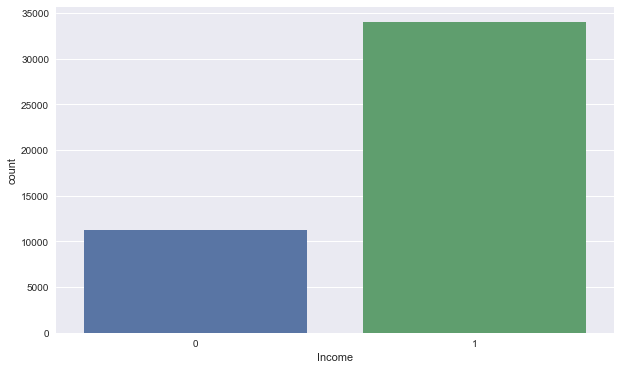

In [15]:
#Graficos estilo seaborn
plt.style.use('seaborn') 
#Tamaño de graficos
plt.rcParams['figure.figsize']=(10,6)
#Grafico de Income
sns.countplot(df['Income'])

1 predomina sobre 0 por lo que puede ser un problema no balanceado

# Variables

In [16]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,collars,workclass_recod,educ_recod,civstatus,region,Income
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017,1.567954,4.299743,3.782274,2.577595,1.061850,0.752156
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508,0.677238,1.221965,0.845175,1.787284,0.331519,0.431766
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000,1.000000,5.000000,4.000000,2.000000,1.000000,1.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000,2.000000,5.000000,5.000000,5.000000,1.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,3.000000,5.000000,5.000000,5.000000,5.000000,1.000000


/Users/ginaozimisa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


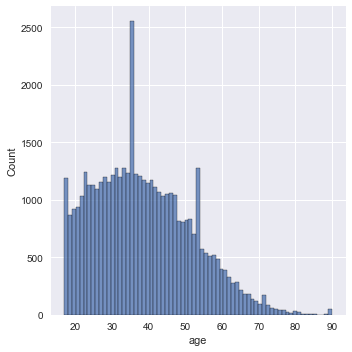

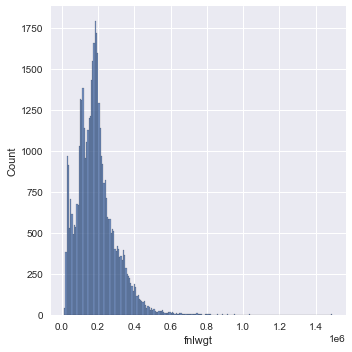

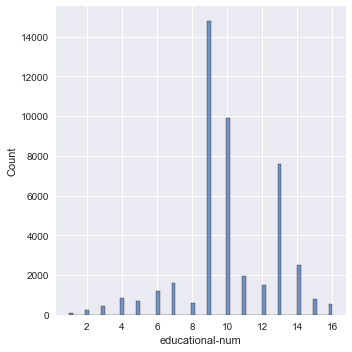

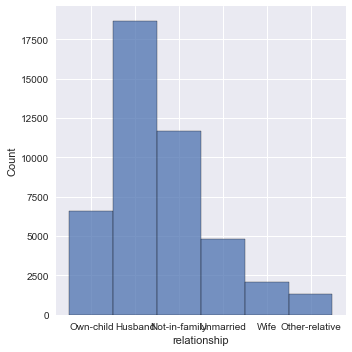

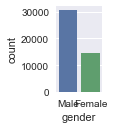

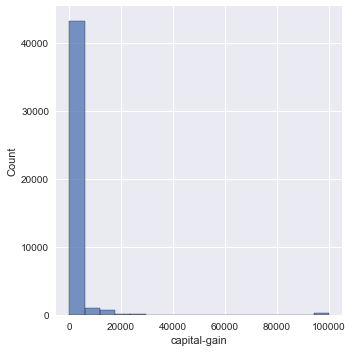

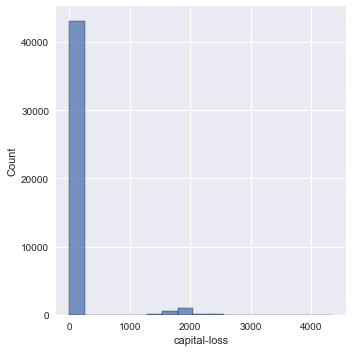

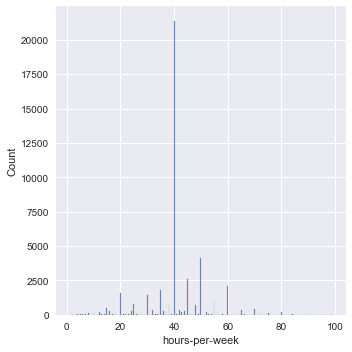

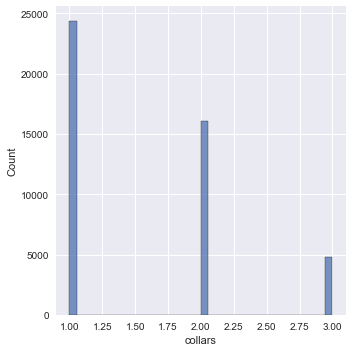

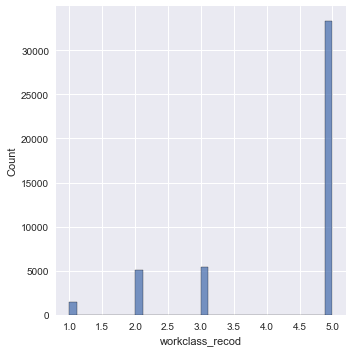

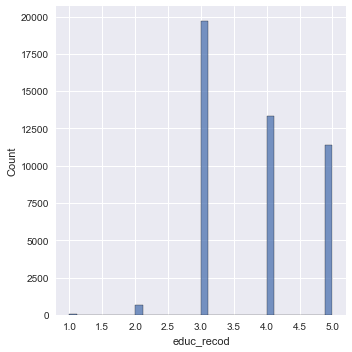

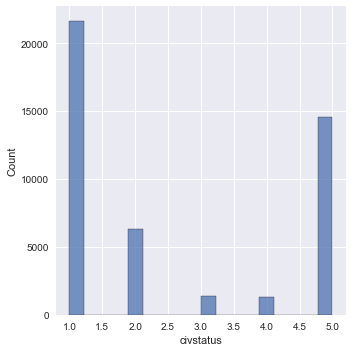

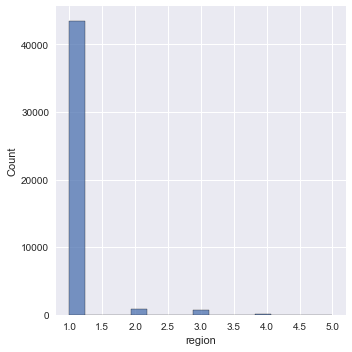

In [17]:
for index, value in enumerate(df):
    # Se salta la columna Income
    if value=='Income':
        print("\n")
    # Si es una variable binaria, se hace un subplot
    elif len(df[value].value_counts())==2:
        plt.subplot(3, 5, index+1)
        sns.countplot(df[value])
    # Si tiene varios valores, se hace un displot
    else:
        sns.displot(df[value])
    plt.tight_layout()

<AxesSubplot:>

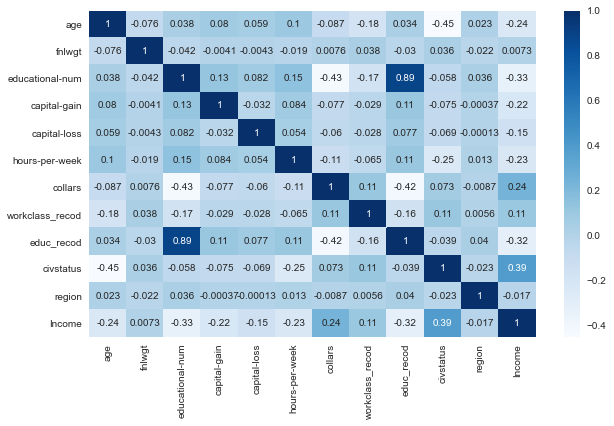

In [18]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

El gráfico de correlación no muestra asociaciones fuertes entre las variables. Pero este no es un impedimento para seguir con la modelación ya que muchas relcaciones no son lineales.

# Datos perdidos

In [19]:
perdida

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Se aprecia que las columnas workclass, occupation, native-country son las unicas que pierden datos, lo que se calcula un 0,88% de perdida. Por lo tanto, se prefiere no hacer nada.
Solo eliminar NaN.


# Hito 3

Inicialmente se tendrá una primera aproximación del problema utilizando una regresión lineal. Asumiendo que la variable dependiente estaremos midiendo la probabilidad del suceso.

$Income=\beta_0 + \beta_1 \times age + \varepsilon_i$

En este caso se propone el siguiente modelo, debido a que age tiene un sesgo hacia los valores bajos.

In [20]:
 # ejecutemos el modelo
m1_ols = smf.ols('Income ~ age', df).fit()

In [21]:
fun.concise_summary(m1_ols)


Goodness of Fit statistics
             Statistics       Value
2                 BIC:  49778.3609
3      Log-Likelihood:     -24878.
4         F-statistic:       2692.
5  Prob (F-statistic):        0.00
6               Scale:     0.17595

Point Estimates

               Coef.  Std.Err.
Intercept  1.050632  0.006081
age       -0.007743  0.000149


Se apuntarán inicialmente los coeficientes y los errores estandar, sacando asi el puntaje z.

In [22]:
1.050632 / 0.006081

172.7728991942115

Con confianza del 95%, siendo el puntaje de corte 1.96. Como es superior al puntaje de corte, existe evidencia de rechazar la hipotesis nula. Como age es la pendiente, al ser negativa la recta es negativa, quiere decir que dos sujetos con las mismas caracteristicas que difieren en la edad, conlleva a una disminución del 0.7743%

In [23]:
-0.007743 / 0.000149

-51.966442953020135

Este puntaje es superior a los puntajes de corte, por lo que se puede rechazar la hipotesis nula

/Users/ginaozimisa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


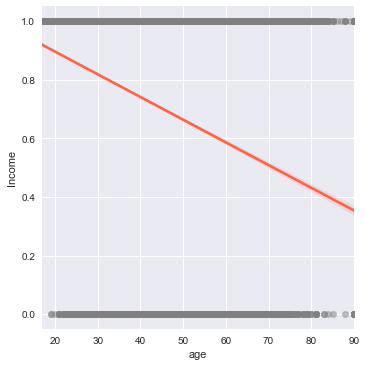

In [24]:
sns.lmplot('age','Income', df,line_kws={'color':'tomato'},scatter_kws={'color': 'grey', 'alpha': .5});

Ahora, como el modelo de probabilidad lineal presenta algunas fallas, se utiliza el modelo de regresión logistica utilizando logit.

In [25]:
m1_logit = smf.logit('Income ~ age', df).fit()
fun.concise_summary(m1_logit)

Optimization terminated successfully.
         Current function value: 0.532330
         Iterations 6

Goodness of Fit statistics
         Statistics       Value
2             BIC:  48167.5256
3  Log-Likelihood:     -24073.
4         LL-Null:     -25322.
5     LLR p-value:      0.0000
6           Scale:      1.0000
7                             

Point Estimates

              Coef.  Std.Err.
Intercept  2.76718  0.037006
age       -0.04118  0.000845


Aún así esto no es correcto dado que los parámetros estimados mediante la regresión logística se conocen como log-odds, que representan el logaritmo de la oportunidad (chance) de
ocurrencia de un evento en específico. Para esto se pasará a Log Odds y luego a probabilidad.

In [26]:
age_mean = df['age'].mean()
print("La media es de ", round(age_mean, 2))
estimate_y = m1_logit.params['Intercept'] + (m1_logit.params['age']* age_mean)
print("El log odds estimado es de ", round(estimate_y, 2))

La media es de  38.55
El log odds estimado es de  1.18


Ahora se pasará a probabilidad

In [27]:
print("La probabilidad promedio de que el individuo percibe ingresos inferiores a 50.000 dólares anuales cuando tiene una edad de 39 años es: ",
      round(fun.invlogit(estimate_y), 2))

La probabilidad promedio de que el individuo percibe ingresos inferiores a 50.000 dólares anuales cuando tiene una edad de 39 años es:  0.76


Se observará cuál es el comportmiento si se aumenta un año de la persona.

In [28]:
pr_dist_100 = fun.invlogit(m1_logit.params['Intercept'] +(m1_logit.params['age'] * 37))
pr_dist_200 = fun.invlogit(m1_logit.params['Intercept'] +(m1_logit.params['age'] * 38))
pr_dist_300 = fun.invlogit(m1_logit.params['Intercept'] +(m1_logit.params['age'] * 39))
pr_dist_400 = fun.invlogit(m1_logit.params['Intercept'] +(m1_logit.params['age'] * 40))

In [29]:
print("La probabilidad de tener ingresos superiores entre 37 y 38 años: ",
round(pr_dist_100 - pr_dist_200, 3))
print("La probabilidad de tener ingresos superiores entre 38 y 39 años: ",
round(pr_dist_200 - pr_dist_300, 3))
print("La probabilidad de tener ingresos superiores entre 39 y 40 años: ",
round(pr_dist_300 - pr_dist_400, 3))

La probabilidad de tener ingresos superiores entre 37 y 38 años:  0.007
La probabilidad de tener ingresos superiores entre 38 y 39 años:  0.007
La probabilidad de tener ingresos superiores entre 39 y 40 años:  0.008


No se puede asumir monotonicidad estricta en los parámetros. La probabilidad de un cambio entre 38 y 39 es distinta a la probabilidad entre 39 y 40.

/Users/ginaozimisa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Una observación tiene igual probabilidad en ambos sucesos cuando x =  67.196


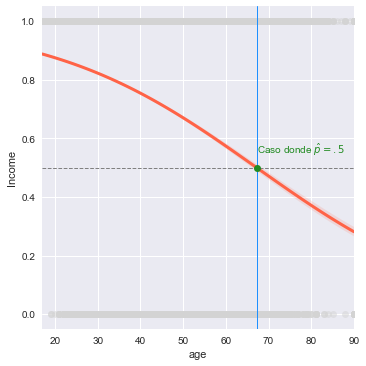

In [30]:
sns.lmplot('age', 'Income', df,
logistic=True,
line_kws={'color':'tomato', 'lw': 3},
scatter_kws={'color': 'lightgrey', 'alpha': .5})
decision_boundary = - m1_logit.params['Intercept'] /m1_logit.params['age']
plt.axvline(decision_boundary, lw=1, color='dodgerblue')
plt.axhline(.5, linestyle='--', color='grey', lw=1)
plt.text(decision_boundary+.2, .5+.05, r'Caso donde $\hat{p}=.5$',
color='forestgreen')
plt.plot(decision_boundary, .5, 'o', color='forestgreen')
print("Una observación tiene igual probabilidad en ambos sucesos cuando x = ", round(decision_boundary, 3));

Se puede notar que a diferencia de la recta, ahora hay una curva no tan pronunciada.
Por lo que se puede ententer, la probabilidad de tener menos o igual ingresos de 50k va disminuyendo a medida de los años.

# Hito 4

Se procede a repetir el proceso pero con collars y civstatus, usando esta vez la funcion analisis_modelo que resume todo el proceso.


Goodness of Fit statistics
             Statistics       Value
2                 BIC:  49750.3734
3      Log-Likelihood:     -24864.
4         F-statistic:       2722.
5  Prob (F-statistic):        0.00
6               Scale:     0.17584

Point Estimates

               Coef.  Std.Err.
Intercept  0.513975  0.004973
collars    0.151906  0.002912


/Users/ginaozimisa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Optimization terminated successfully.
         Current function value: 0.528052
         Iterations 6

Goodness of Fit statistics
         Statistics       Value
2             BIC:  47780.5720
3  Log-Likelihood:     -23880.
4         LL-Null:     -25322.
5     LLR p-value:      0.0000
6           Scale:      1.0000
7                             

Point Estimates

               Coef.  Std.Err.
Intercept -0.337205  0.029735
collars    0.995138  0.020433
La media es de  1.57
El log odds estimado es de  1.22
La probabilidad promedio de que el individuo percibe ingresos inferiores a 50.000 dólares anuales cuando tiene una edad de 39 años es:  0.77


/Users/ginaozimisa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Una observación tiene igual probabilidad en ambos sucesos cuando x =  0.339


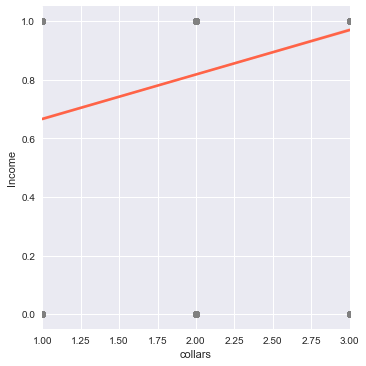

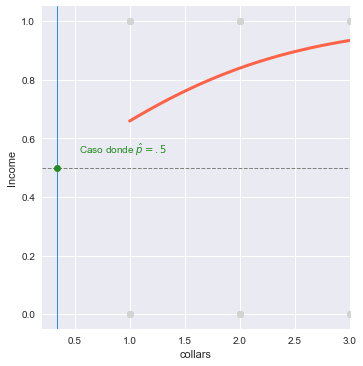

In [31]:
fun.analisis_modelo('collars', 'Income', df)


Goodness of Fit statistics
             Statistics       Value
2                 BIC:  44869.9621
3      Log-Likelihood:     -22424.
4         F-statistic:       8185.
5  Prob (F-statistic):        0.00
6               Scale:     0.15785

Point Estimates

               Coef.  Std.Err.
Intercept  0.508380  0.003279
civstatus  0.094575  0.001045


/Users/ginaozimisa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Optimization terminated successfully.
         Current function value: 0.466328
         Iterations 7

Goodness of Fit statistics
         Statistics       Value
2             BIC:  42198.0119
3  Log-Likelihood:     -21088.
4         LL-Null:     -25322.
5     LLR p-value:      0.0000
6           Scale:      1.0000
7                             

Point Estimates

               Coef.  Std.Err.
Intercept -0.413528  0.020556
civstatus  0.766888  0.011225
La media es de  2.58
El log odds estimado es de  1.56
La probabilidad promedio de que el individuo percibe ingresos inferiores a 50.000 dólares anuales cuando tiene una edad de 39 años es:  0.83


/Users/ginaozimisa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Una observación tiene igual probabilidad en ambos sucesos cuando x =  0.539


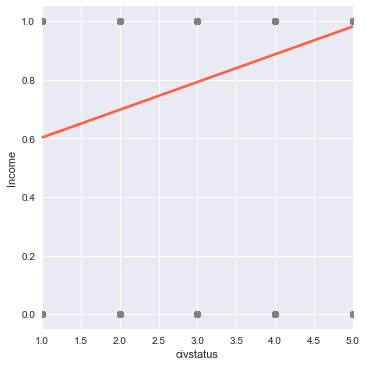

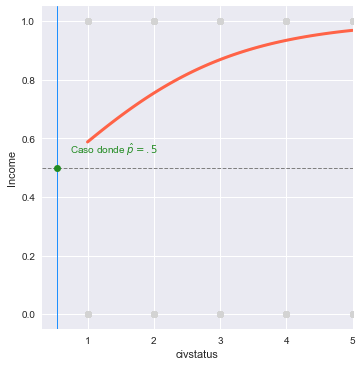

In [38]:
fun.analisis_modelo('civstatus', 'Income', df)

En estos casos el mejor modelo es civstatus ya que "afecta" más a los ingresos

Se usarán tres modelos, estos tendran una division para el entrenamiento y el testeo usaando train_test_split() y la función llamada learn() creada en el script funciones_clasificacion.py donde se realizan todos los calculos para las variables del modelo.

In [33]:
#Se borran las columnas que no se pueden transformar, ya que no se especifico estos datos
newtrain=df.drop(['relationship','race','gender','Income'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(newtrain, df['Income'], test_size=.33, random_state=11238)
fun.learn(X_train, X_test, y_train, y_test, df)



Matriz de confusion
[[ 2005  1729]
 [  744 10446]]
Se calcula la exactitud promedio de datos que fueron correctamente predecidos:  0.8342937550254623
Se compara frente al caso de identificar aleatoriamente una observación correcta
Tiene un 0.3342937550254623 superior que un clasificador aleatorio
Precision:  0.857987679671458 
Recall:  0.9335120643431636 
F1:  0.8941579285255725
Hay un  0.857987679671458 % de identificaciones positivas correctas. Hay un  0.9335120643431636 % de positivos reales que se identificó correctamente. La medida general de desempeño es  0.8941579285255725 %.


In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(newtrain, df['Income'], test_size=.33, random_state=12345)
fun.learn(X_train2, X_test2, y_train2, y_test2, df)

Matriz de confusion
[[ 2056  1644]
 [  696 10528]]
Se calcula la exactitud promedio de datos que fueron correctamente predecidos:  0.8432055749128919
Se compara frente al caso de identificar aleatoriamente una observación correcta
Tiene un 0.34320557491289194 superior que un clasificador aleatorio
Precision:  0.8649359185014788 
Recall:  0.9379900213827512 
F1:  0.8999829030603521
Hay un  0.8649359185014788 % de identificaciones positivas correctas. Hay un  0.9379900213827512 % de positivos reales que se identificó correctamente. La medida general de desempeño es  0.8999829030603521 %.


In [35]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(newtrain, df['Income'], test_size=.33, random_state=84756)
fun.learn(X_train3, X_test3, y_train3, y_test3, df)

Matriz de confusion
[[ 2092  1567]
 [  794 10471]]
Se calcula la exactitud promedio de datos que fueron correctamente predecidos:  0.841798445456982
Se compara frente al caso de identificar aleatoriamente una observación correcta
Tiene un 0.341798445456982 superior que un clasificador aleatorio
Precision:  0.8698288752284432 
Recall:  0.9295162006213937 
F1:  0.8986825730592628
Hay un  0.8698288752284432 % de identificaciones positivas correctas. Hay un  0.9295162006213937 % de positivos reales que se identificó correctamente. La medida general de desempeño es  0.8986825730592628 %.


Tanto en el promedio de datos correctamente predecidos y en la matriz de confución se puede notar facilmente que hubo una gran cantidad de aciertos.

Con este porcentaje no se puede estar seguro dado que no hace distinción alguna frente a los tipos de errores (Falso Negativo y Falso Positivo), para eso se tiene la precision y recall, estos sugieren que el modelo tiene un desempeño aceptable. Dando una medida general aceptable.